google collab link - https://drive.google.com/file/d/1a5j1CvC4ixgksKcRgWEo9vkFUA7zVnin/view?usp=sharing

# Importing Libraries

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind,ttest_rel
import missingno as msng
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Agenda—To distill and articulate data-derived insights in a manner that is easily comprehensible for Stakeholders without a technical background and help data science team to make models out of the data

# Importing Dataset

In [3]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181')

In [4]:
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


# Basic Data Cleaning and Wrangling

## Dealing With Null Values
- Find out columns which contain Null Values
- Find out the percentage of Null Values
- Create a Reference Data Reference Dataset and match values from that dataset
- If there are Still Null Values, then it's better to delete them or impute them (depends on dataset)
### Insights on Null Values
- Only two columns Source_Name, Destination_Name have Null Values
- Only 0.2 percent and 0.18 percent of data from Source_Name, Destination_Name have Null Values, It can still be mapped  

Deleting irrelevant columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [6]:
df.drop(columns=['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

Getting Columns with Null Values

In [8]:
df.columns[df.isna().any()]

Index(['source_name', 'destination_name'], dtype='object')

Getting Percentage of Null Values

In [9]:
(df.isna().sum()/df.shape[0] *100).reset_index().rename({0: "miss_perc"},axis = 1)

,index,miss_perc
0,data,0.000000
1,trip_creation_time,0.000000
2,route_schedule_uuid,0.000000
3,route_type,0.000000
4,trip_uuid,0.000000
5,source_center,0.000000
6,source_name,0.202254
7,destination_center,0.000000
8,destination_name,0.180165
9,od_start_time,0.000000


Getting A visual representation of Columns with Null Values, and whether there is a Correlation b/w or not

<Axes: >

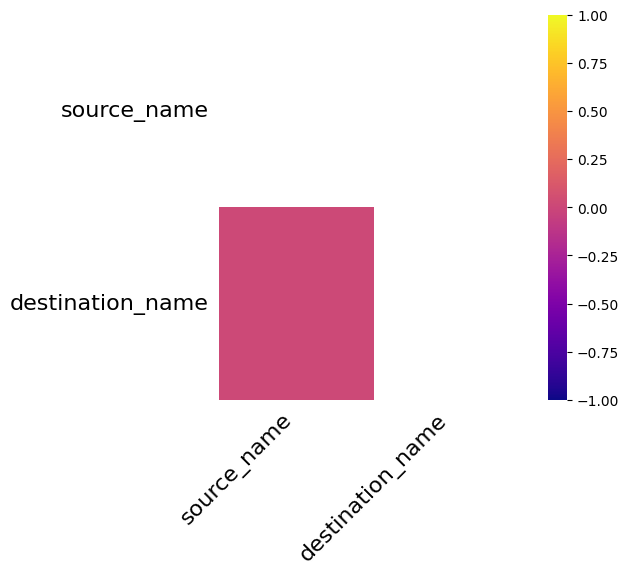

In [10]:
msng.heatmap(df,cmap='plasma',figsize=(5,5))

###  Handling Null Values
- Create a Reference list of Center Code and Center Name and Validated Result
- Turns out There Few Center-ID With Null Values, Which resulted in the same result as Before

In [11]:
list_of_source_center = df.groupby(['source_center','source_name']).size().reset_index()
list_of_source_center = list_of_source_center.rename(columns={0: 'count','source_center':'center','source_name':'name'}).drop(columns=['count'])
list_of_source_center.sample(5)

,center,name
898,IND560078AAC,BLR_JPNagar_Pc (Karnataka)
376,IND312403AAA,BariSadri_BhmprDPP_D (Rajasthan)
671,IND462021AAA,Bhopal_Indrapri_DC (Madhya Pradesh)
560,IND410505AAB,Rajgurunagar_Chakan_D (Maharashtra)
66,IND125050AAA,Fatehabad_SirsaDPP_D (Haryana)


In [12]:
list_of_destination_center = df.groupby(['destination_center','destination_name']).size().reset_index()
list_of_destination_center = list_of_destination_center.rename(columns={0: 'count','destination_center':'center','destination_name':'name'}).drop(columns=['count'])
list_of_destination_center.sample(5)

,center,name
504,IND396105AAA,Bhilad_Umargaon_DC (Gujarat)
599,IND421601AAB,Asangaon_Shahapur_D (Maharashtra)
752,IND504208AAB,Mancherial_Hitech_D (Telangana)
577,IND415003AAA,Satara_DC (Maharashtra)
723,IND496001AAA,Raigarh_MithmdRd_D (Chhattisgarh)


In [13]:
center_lookup = pd.concat([list_of_source_center,list_of_destination_center],ignore_index=True)
center_lookup.drop_duplicates(inplace=True)
center_to_name = center_lookup.set_index('center')['name'].to_dict()

#### Method—1 Filling Values using Reference
- After Creating a Reference Table, we create a Dictionary
- Later we apply the map function to the respective columns

In [14]:
center_to_name  # this is a dictionary of all the Center and Names
dict(zip(list(center_to_name.keys())[:5], list(center_to_name.values())[:5])) #Top 5 entries of this dictionary

{'IND000000AAL': 'Pune_PC (Maharashtra)',
 'IND000000AAQ': 'Barasat_KrshnNgr_D (West Bengal)',
 'IND000000AAS': 'Bongaigaon_Chpaguri_D (Assam)',
 'IND000000AAZ': 'Buldhana_Thsil3PL_D (Maharashtra)',
 'IND000000ABA': 'Cochin_Chtrpuza_D (Kerala)'}

In [15]:
df['source_name'] = df['source_center'].map(center_to_name)
df['destination_name'] = df['destination_center'].map(center_to_name)

#### Checking Null Values
- Turns out there are still Null Values
- The Best way to move forward is to got with Method 2 i.e. Imputing using Mode

In [16]:
print(f"Are there any null values in dataset : {df.isna().any().any()}")

Are there any null values in dataset : True


Getting List of Center with null values

In [17]:
null_source_center = pd.Series(df[df['source_name'].isna()]['source_center'].unique())
null_destination_center = pd.Series(df[df['destination_name'].isna()]['destination_center'].unique())

In [18]:
pd.DataFrame(pd.concat([null_source_center,null_destination_center],ignore_index=True)).rename(columns={0:"Null Centres"})

,Null Centres
0,IND342902A1B
1,IND577116AAA
2,IND282002AAD
3,IND465333A1B
4,IND841301AAC
5,IND509103AAC
6,IND126116AAA
7,IND331022A1B
8,IND505326AAB
9,IND852118A1B


#### Method 2 - Deleting Null Values
- Reason Why we didn't went with impute is because if we decide to impute using mode , there would be an conflict with source code and destination code

In [19]:
df = df.dropna()

#### Checking Null Values

In [20]:
print(f"Are there any NUll values in Dataset : {df.isna().any().any()}")

Are there any NUll values in Dataset : False


## Examining the Data Structure
- Analyzing the data types of the columns and implementing necessary corrections.
- Conduct a detailed overview of the columns.
- After Manipulating the Data and Adding Features, we have 14.7K rows and 28 Features (Columns)
## Data Wrangling Procedures
- The dataset contained several columns that required conversion from object data type to a datetime data type.
- The format of this dataset is wide with almost 19 features.
- This non-aggregated dataset is segmented with visible divisions between each segment. It's best to aggregate it
- Columns like actual_time, osrm_time etc. are computed using a cumulative sum of columns like segment_actual_time, segment_osrm_time
- To get started first, we did aggregation at segment level by creating a feature `unified_key` which is concatenation of Unique ID for a trip, source, destination.  This Activity reduced the dataset from 100K++ rows to 22K++ rows
- Changed column to of `start_scan_to_end_scan ` to `delivery duration` for better clarity of features
- We further did Aggregation at `trip_uuid` Level , further reducing table to just 14k rows
- After Removing Outliers we have approximately 12K records

In [21]:
df.sample(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
21333,test,2018-10-01 01:03:59.966557,thanos::sroute:16f438c4-c258-4955-8358-bdb1e25...,FTL,trip-153835583996626094,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND712311AAA,Kolkata_Dankuni_HB (West Bengal),2018-10-01 01:03:59.966557,2018-10-03 06:14:52.375160,3190.0,883.499299,1569.0,770.0,1077.9889,156.0,51.0,72.5363
73500,training,2018-09-20 18:32:29.540193,thanos::sroute:6b87651c-fdf4-432f-bf80-0e394f3...,FTL,trip-153746834953980860,IND712311AAA,Kolkata_Dankuni_HB (West Bengal),IND781018AAB,Guwahati_Hub (Assam),2018-09-20 18:32:29.540193,2018-09-22 21:19:40.654541,3047.0,396.260772,1807.0,490.0,674.7769,441.0,118.0,168.3299
140901,training,2018-09-14 13:56:01.000990,thanos::sroute:037072f0-dc09-4a64-a5b7-0d0dc43...,FTL,trip-153693336100076409,IND313001AAB,Udaipur_Mangri_I (Rajasthan),IND312001AAA,Chittaurgarh_DC (Rajasthan),2018-09-14 13:56:01.000990,2018-09-15 00:03:23.290584,607.0,94.563260,166.0,79.0,108.2751,9.0,5.0,7.0058
78253,training,2018-09-16 19:41:42.146679,thanos::sroute:2c33e360-7e52-4d2c-a9db-fe24996...,FTL,trip-153712690214643407,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-16 19:41:42.146679,2018-09-18 20:02:53.147531,2901.0,573.792348,1109.0,521.0,701.8845,43.0,16.0,24.0074
77392,training,2018-09-13 09:04:15.841205,thanos::sroute:f6912dfd-a9cf-4ea7-a7ce-1403d4a...,FTL,trip-153682945584094525,IND501359AAE,Hyderabad_Shamshbd_H (Telangana),IND518002AAA,Kurnool_AbbasNgr_I (Andhra Pradesh),2018-09-13 09:04:15.841205,2018-09-13 15:56:24.686359,412.0,133.403349,194.0,110.0,156.1005,34.0,15.0,21.8658


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  actual_distance_

Converting dtype from Object to Datetime

In [23]:
cols = ['trip_creation_time','od_start_time','od_end_time']

for col in cols:
    temp = pd.to_datetime(df[col], format="%Y-%m-%d %H:%M:%S.%f", errors='coerce')
    if temp.isnull().any():
        df[col] = pd.to_datetime(df[col], format="%Y-%m-%d %H:%M:%S", errors='coerce')
    else:
        df[col] = temp

creating a segment key

In [24]:
df['unified_key'] = df['trip_uuid']+ " " + df['source_center'] + " " +df['destination_center']
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,unified_key
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320 IND388121AAA IND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320 IND388121AAA IND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320 IND388121AAA IND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320 IND388121AAA IND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320 IND388121AAA IND388620AAB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858,trip-153746066843555182 IND131028AAB IND000000ACB
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725,trip-153746066843555182 IND131028AAB IND000000ACB
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053,trip-153746066843555182 IND131028AAB IND000000ACB
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,73.680667,158.0,98.0,111.2709,17.0,27.0,18.8885,trip-153746066843555182 IND131028AAB IND000000ACB


Rename Column to get better Understanding

In [25]:
df.rename(columns={'start_scan_to_end_scan':'delivery_duration'},inplace=True)

Grouping BY Unified Key   

In [26]:
create_segment_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'delivery_duration' : 'first',


    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time' : 'sum',
    'segment_osrm_distance' : 'sum',
    'segment_osrm_time' : 'sum',

}

In [27]:
df = df.groupby('unified_key').agg(create_segment_dict).sort_values(by=['unified_key','od_end_time'], ascending=True).reset_index()

In [28]:
df

,unified_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,delivery_duration,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time
0,trip-153671041653548748 IND209304AAA IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,trip-153671041653548748 IND462022AAA IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,trip-153671042288605164 IND561203AAB IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,trip-153671042288605164 IND572101AAA IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,trip-153671043369099517 IND000000ACB IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069 IND628204AAA IND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0
26218,trip-153861115439069069 IND628613AAA IND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0
26219,trip-153861115439069069 IND628801AAA IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0
26220,trip-153861118270144424 IND583119AAA IND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0


In [29]:
df[df['trip_uuid'] == 'trip-153671041653548748']

,unified_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,delivery_duration,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time
0,trip-153671041653548748 IND209304AAA IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,trip-153671041653548748 IND462022AAA IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0


In [30]:
df['od_time_diff_hour'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 60

Now we Can do Another Aggregation at Trip Uid Level

In [31]:
df

,unified_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,od_end_time,delivery_duration,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,od_time_diff_hour
0,trip-153671041653548748 IND209304AAA IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),...,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0,1260.604421
1,trip-153671041653548748 IND462022AAA IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),...,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0,999.505379
2,trip-153671042288605164 IND561203AAB IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),...,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0,58.832388
3,trip-153671042288605164 IND572101AAA IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),...,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0,122.779486
4,trip-153671043369099517 IND000000ACB IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),...,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0,834.638929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069 IND628204AAA IND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),...,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0,62.115193
26218,trip-153861115439069069 IND628613AAA IND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),...,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0,91.087797
26219,trip-153861115439069069 IND628801AAA IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),...,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0,44.174403
26220,trip-153861118270144424 IND583119AAA IND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),...,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0,287.474007


In [32]:
trip_agg = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_time_diff_hour' : 'sum',
    'delivery_duration' : 'sum',

    'actual_distance_to_destination' : 'sum',

    'actual_time' : 'sum',
    'segment_actual_time' : 'sum',

    'osrm_time' : 'sum',
    'segment_osrm_time' : 'sum',

    'osrm_distance' : 'sum',
    'segment_osrm_distance' : 'sum',

}

In [33]:
df = df.groupby('trip_uuid').agg(trip_agg).reset_index(drop = True)

### Feature Engineer
- Feature Engineered `od_time_diff_hour` by calculating difference b/w `od_end_time` and `od_start_time` and it is similar to `delivery duration`
- Creating new Date Time Columns from `trip_creating_feature`
- Fetching Names of Cities, States, Places from `destination_name` and `source_name`

In [34]:
df['trip_year'] = df['trip_creation_time'].dt.year
df['trip_month'] = df['trip_creation_time'].dt.month
df['trip_hour'] = df['trip_creation_time'].dt.hour
df['trip_day'] = df['trip_creation_time'].dt.day
df['trip_dayofweek'] = df['trip_creation_time'].dt.dayofweek
df[['trip_year', 'trip_month', 'trip_hour', 'trip_day', 'trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_dayofweek
0,2018,9,0,12,2
1,2018,9,0,12,2
2,2018,9,0,12,2
3,2018,9,0,12,2
4,2018,9,0,12,2
...,...,...,...,...,...
14782,2018,10,23,3,2
14783,2018,10,23,3,2
14784,2018,10,23,3,2
14785,2018,10,23,3,2


In [35]:
def state_name(x) :
    return x.split('(')[1].replace(")","")
def city_name(x) :
    return x.split("(")[0].split("_")[0]
def place_name(x) :
    x = x.split('(')[0]
    len_ = len(x.split('_'))
    if len_ >=3 :
        return x.split("_")[1]
    if len_ == 2 :
        return x.split('_')[0]
    return x.split(' ')[0]

In [36]:
df['source_state'] = df['source_name'].apply(lambda x: state_name(x))
df['destination_state'] = df['destination_name'].apply(lambda x: state_name(x))
df['source_city']= df['source_name'].apply(lambda x: city_name(x))
df['destination_city']= df['destination_name'].apply(lambda x: city_name(x))
df['source_place'] = df['source_name'].apply(lambda x: place_name(x))
df['destination_place'] = df['destination_name'].apply(lambda x: place_name(x))

# Exploratory Data Analysis
- This Dataset is for the year 2018 from the Month of September to October
- Mean and Median of **Delivery Duration** which is <ins> Time taken to deliver from source to destination </ins> for a trip is approximately 320 mins, 233 mins i.e. 5 hours and 4 hours  respectively
- Mean and Median of **Actual Distance to Destination** which is the <ins> Distance between Source and Destination Warehouse </ins> is approximately 72 Kms and 38 Kms
- Mean and Median of **Actual_time** which is <ins> Actual time taken to complete the delivery </ins> is 177 mins , 114 mins i.e. 3 and 2 hours respectively
- Mean and Median of **OSRM_time** which is <ins> open-source routing engine time calculator which computes the shortest path between points in a given map </ins> is 78 mins ,50 mins which is around 1 hour
- Mean and Median of **OSRM_Distance** which is <ins> open-source routing engine which computes the shortest path between points in a given map </ins> is 97 kms and 54 kms

# Univariate Analysis

In [37]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_time_diff_hour,...,trip_month,trip_hour,trip_day,trip_dayofweek,source_state,destination_state,source_city,destination_city,source_place,destination_place
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2260.109800,...,9,0,12,2,Uttar Pradesh,Uttar Pradesh,Kanpur,Kanpur,Central,Central
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),181.611874,...,9,0,12,2,Karnataka,Karnataka,Doddablpur,Doddablpur,ChikaDPP,ChikaDPP
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3934.362520,...,9,0,12,2,Haryana,Haryana,Gurgaon,Gurgaon,Bilaspur,Bilaspur
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.494935,...,9,0,12,2,Maharashtra,Maharashtra,Mumbai Hub,Mumbai,Mumbai,MiraRd
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),718.349042,...,9,0,12,2,Karnataka,Karnataka,Bellary,Sandur,Bellary,WrdN1DPP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),258.028928,...,10,23,3,2,Punjab,Punjab,Chandigarh,Chandigarh,Mehmdpur,Mehmdpur
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.590521,...,10,23,3,2,Haryana,Haryana,FBD,Faridabad,Balabhgarh,Blbgarh
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),422.119867,...,10,23,3,2,Uttar Pradesh,Uttar Pradesh,Kanpur,Kanpur,GovndNgr,GovndNgr
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),348.512862,...,10,23,3,2,Tamil Nadu,Tamil Nadu,Tirunelveli,Tirchchndr,VdkkuSrt,Shnmgprm


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  object        
 1   trip_creation_time              14787 non-null  datetime64[ns]
 2   route_schedule_uuid             14787 non-null  object        
 3   route_type                      14787 non-null  object        
 4   trip_uuid                       14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   od_time_diff_hour               14787 non-null  float64       
 10  delivery_duration               14787 non-null  float64       
 11  ac

---
Checking for Null Values

In [39]:
print(f"Are there any Null Values : {df.isna().any().any()}")

Are there any Null Values : False


---
Getting an Overview of Data


In [40]:
df.describe()

,od_time_diff_hour,delivery_duration,actual_distance_to_destination,actual_time,segment_actual_time,osrm_time,segment_osrm_time,osrm_distance,segment_osrm_distance,trip_year,trip_month,trip_hour,trip_day,trip_dayofweek
count,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.0,14787.000000,14787.000000,14787.000000,14787.000000
mean,530.313517,529.429025,164.090196,356.306012,353.059174,160.990938,180.511598,203.887411,222.705466,2018.0,9.120105,12.456212,18.375127,2.920944
std,658.415490,658.254936,305.502982,561.517936,556.365911,271.459495,314.679279,370.565564,416.846279,0.0,0.325096,7.987387,7.882198,1.927690
min,23.461468,23.000000,9.002461,9.000000,9.000000,6.000000,6.000000,9.072900,9.072900,2018.0,9.000000,0.000000,1.000000,0.000000
25%,149.698496,149.000000,22.777099,67.000000,66.000000,29.000000,30.000000,30.756900,32.578850,2018.0,9.000000,4.000000,14.000000,1.000000
50%,279.710750,279.000000,48.287894,148.000000,147.000000,60.000000,65.000000,65.302800,69.784200,2018.0,9.000000,14.000000,19.000000,3.000000
75%,633.537697,632.000000,163.591258,367.000000,364.000000,168.000000,184.000000,206.644200,216.560600,2018.0,9.000000,20.000000,25.000000,5.000000
max,7898.551955,7898.000000,2186.531787,6265.000000,6230.000000,2032.000000,2564.000000,2840.081000,3523.632400,2018.0,10.000000,23.000000,30.000000,6.000000


In [41]:
df.describe(include='object')

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,source_state,destination_state,source_city,destination_city,source_place,destination_place
count,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787
unique,2,1497,2,14787,930,930,1035,1035,29,31,731,856,770,874
top,training,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,Carting,trip-153671041653548748,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Maharashtra,Maharashtra,Gurgaon,Bengaluru,Bilaspur,Bilaspur
freq,10645,53,8906,1,1052,1052,821,821,2714,2561,1128,1088,1074,864



### Outlier Analysis
- There are few outliers

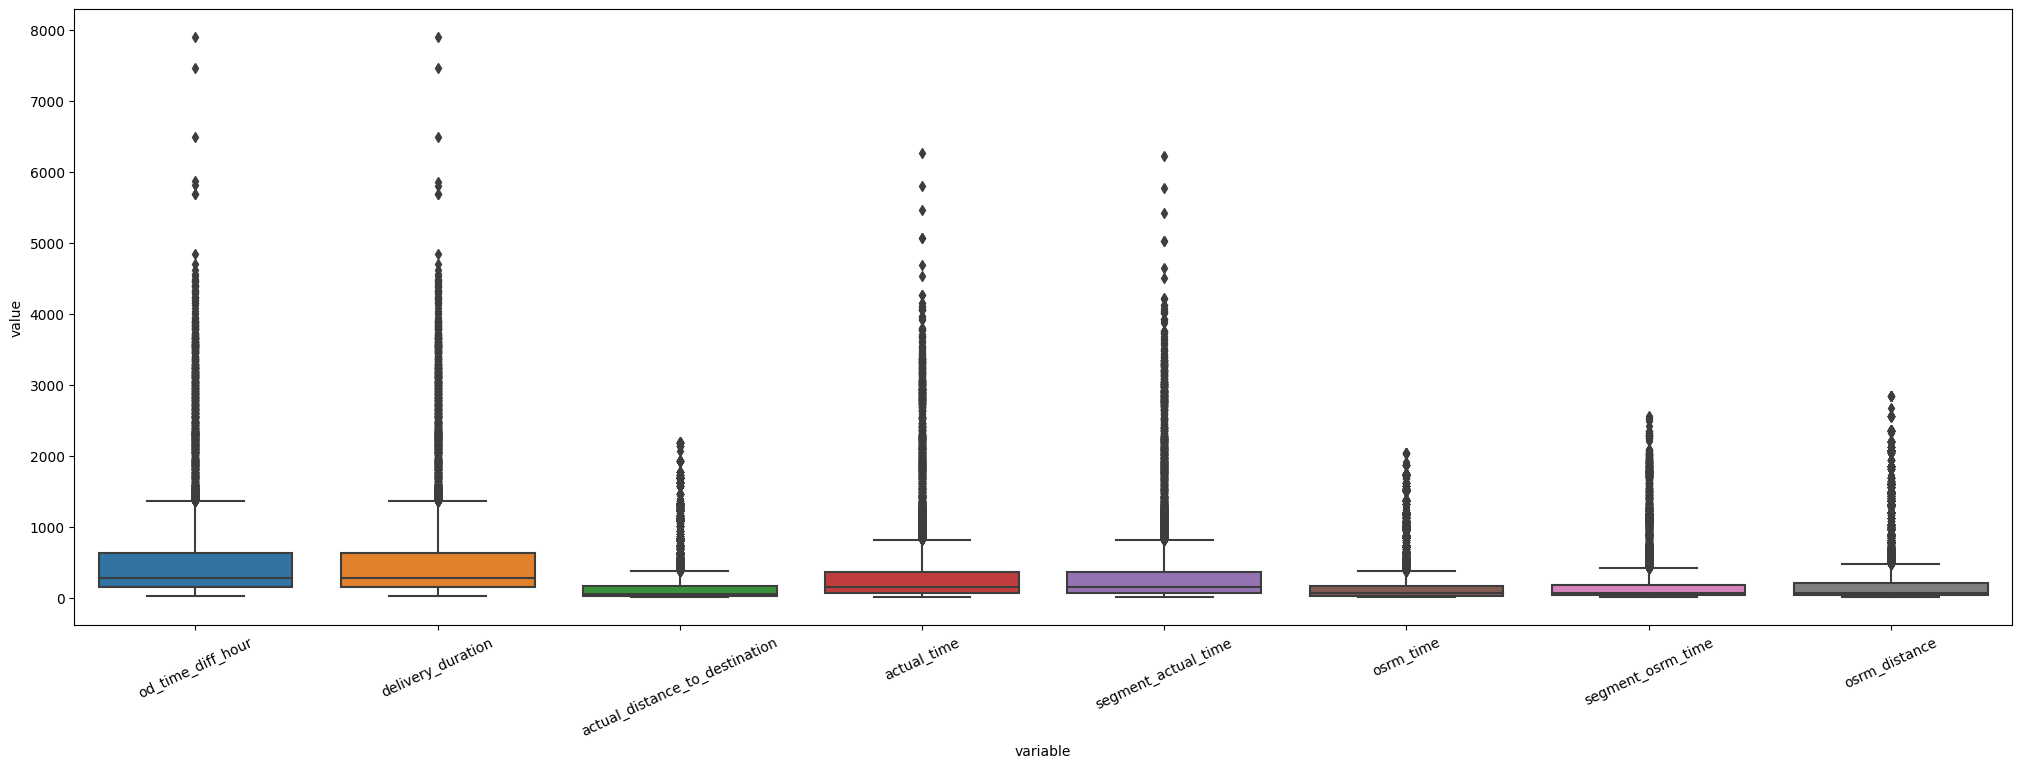

In [42]:
x = df.select_dtypes(exclude = ['object','datetime']).columns[:-6]
df_melt = df[x].melt()
plt.figure(figsize=(25,8))
sns.boxplot(x='variable', y='value', data=df_melt)
plt.xticks(rotation=25)
plt.show()

#### Handling Outliers

Converting Relevent Columns to categories

In [43]:
df[['data','route_type','trip_month','trip_hour','trip_day','trip_dayofweek','source_state','destination_state','source_city','destination_city','source_place','destination_place']] = df[['data','route_type','trip_month','trip_hour','trip_day','trip_dayofweek','source_state','destination_state','source_city','destination_city','source_place','destination_place']].astype('category')

In [44]:
p75 = df[x].quantile(0.75)
p25 = df[x].quantile(0.25)
iqr  = p75 - p25
hw= (p75 + (iqr*1.5))

In [45]:
print(f"Outliers Percent {len(df[(df[x] > hw).all(axis=1)]) / df.shape[0] * 100}")

Outliers Percent 6.877662811929397


In [46]:
df = df[~( (df[x] < (p25 - 1.5 * iqr) ) | (df[x] > (p75 + 1.5 * iqr) ) ).any(axis=1)].reset_index(drop = True)

In [47]:
df.shape

(12730, 29)

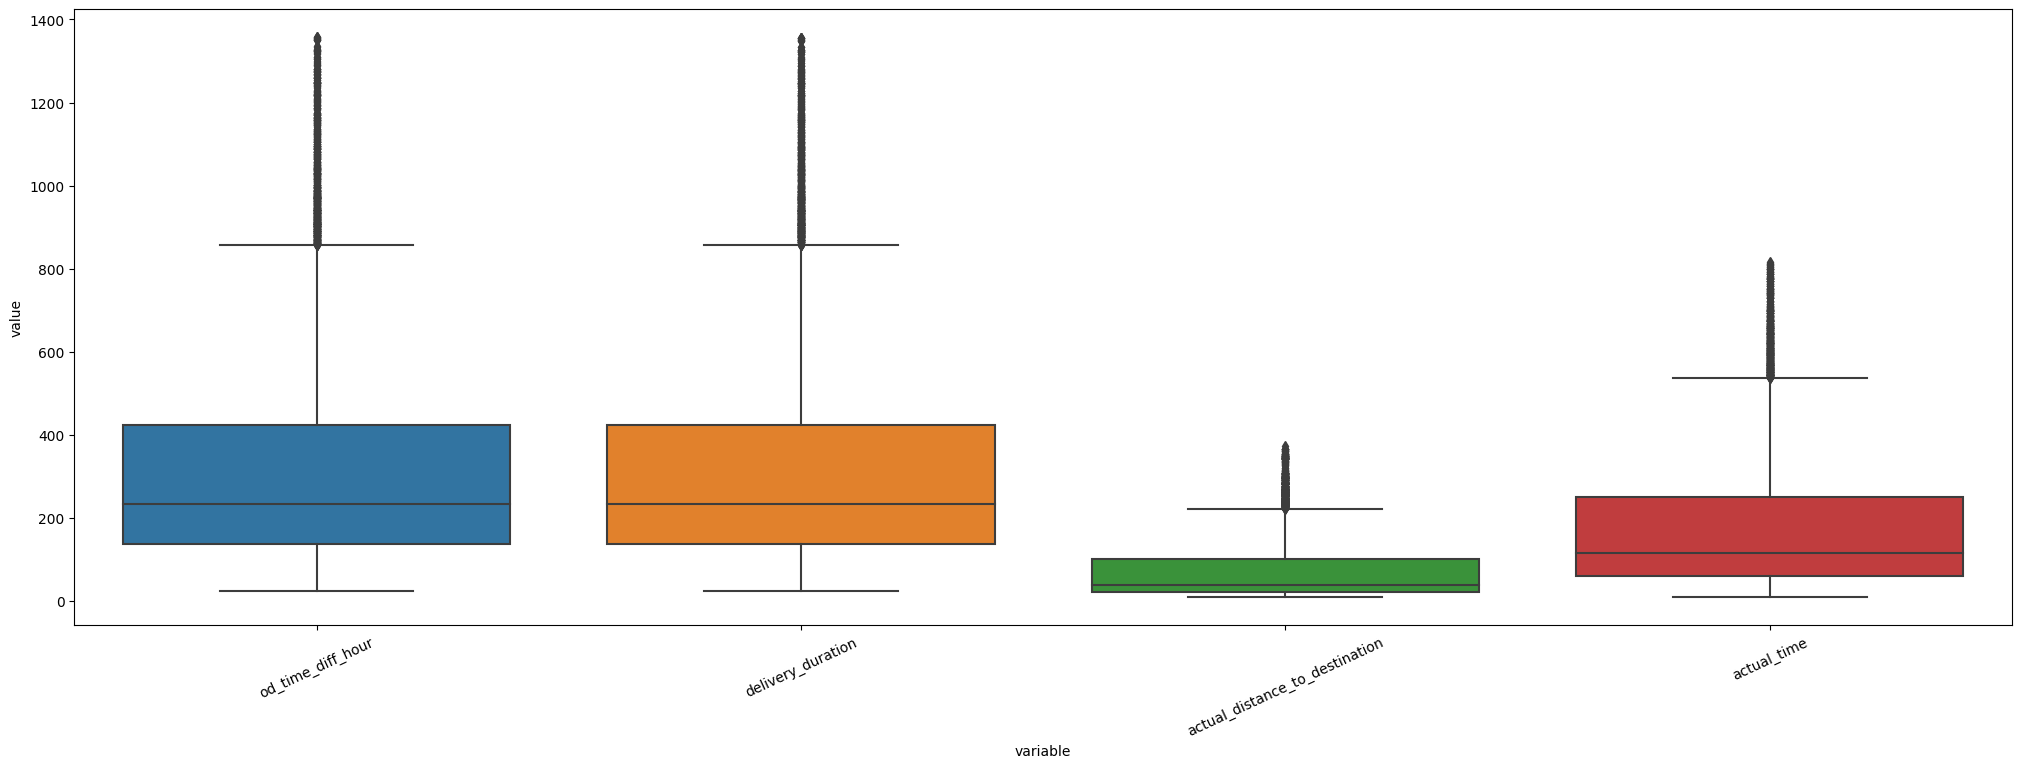

In [48]:
x = df.select_dtypes(exclude = ['object','datetime','category']).columns[:-6]
df_melt = df[x].melt()
plt.figure(figsize=(25,8))
sns.boxplot(x='variable', y='value', data=df_melt)
plt.xticks(rotation=25)
plt.show()

---
Distribution of Data

In [49]:
sns.pairplot(df)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Categorical Columns Overview
- From **Route_Type** we can see <inf>most</inf> of the transportation is done through **Carting**
    * FTL – Full Truck Load: FTL shipments get to the destination sooner
    * Carting: Handling system consisting of small vehicles
- We can see a High count of Transportation in the month of September; Reason Likely because of Limitation of Data
- Interesting Insight was found out When Analyzed Hourly Overview
    *  Quiet Hours:[8,14] we usually see low counts of transport taking place
    *  Transitional Hours: [15,20) we can see a transition from Quiet to Peak Hours
    *  Peak Hours: [20,0]  we can the highest count of transportation taking place
    * Declining Hours: [1,7] we can a decline in transport Activity after which we experience Quiet Hours
- While observing **Daily Trip** overview, we can **more than 500** daily transports
- On **Wednesday** we can expect the **highest transportation activity** while **Sunday it's Lowest**
- We can see **highest transportation** activity in **Southern Region** while the **least** in the **North Eastern Region**  
- We can see **Maharashtra, Karnataka and Haryana** being the places with the highest transportation Actitivy
- **Bengaluru(Karnataka)** is the busiest city  

---
Converting to Categorical Columns

In [50]:
df.select_dtypes( include =  ['category']).columns

Index(['data', 'route_type', 'trip_month', 'trip_hour', 'trip_day',
       'trip_dayofweek', 'source_state', 'destination_state', 'source_city',
       'destination_city', 'source_place', 'destination_place'],
      dtype='object')

----
##### Trivial -  Creating A Region Segment

In [51]:
region_segment = {
    "Central": ["Chhattisgarh", "Madhya Pradesh", "Uttar Pradesh", "Uttarakhand"],
    "Eastern": ["Bihar", "Jharkhand", "Odisha", "West Bengal",'Orissa'],
    "Western": ["D&N Haveli","Daman & Diu", "Goa", "Gujarat", "Maharashtra",'Dadra and Nagar Haveli'],
    "Northern": ["Chandigarh", "Delhi UT", "Haryana", "Himachal Pradesh", "Jammu & Kashmir", "Ladakh", "Punjab", "Rajasthan","Delhi"],
    "Southern": ["Andhra Pradesh", "Karnataka", "Kerala", "Lakshadweep", "Puducherry", "Tamil Nadu", "Telangana",'Pondicherry'],
    "North-Eastern": ["A&N Islands", "Arunachal Pradesh", "Assam", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Sikkim", "Tripura"]
}

In [52]:
for state in df['source_state'] :
    for region,states in region_segment.items() :
        if state in states :
            df.loc[df["source_state"] == state, "Source Region"] = region

In [53]:
for state in df['destination_state'] :
    for region,states in region_segment.items() :
        if state in states :
            df.loc[df["destination_state"] == state, "Destination Region"] = region

----
fetching relevant columns

In [55]:
misc_cols = ['data','route_type']
trips_cols = ['trip_month', 'trip_hour', 'trip_day', 'trip_dayofweek']
state_cols = ['source_state', 'destination_state'] # Other state columns Visualization are better suited for Softwares like Power BI

### Miscallenous Plots

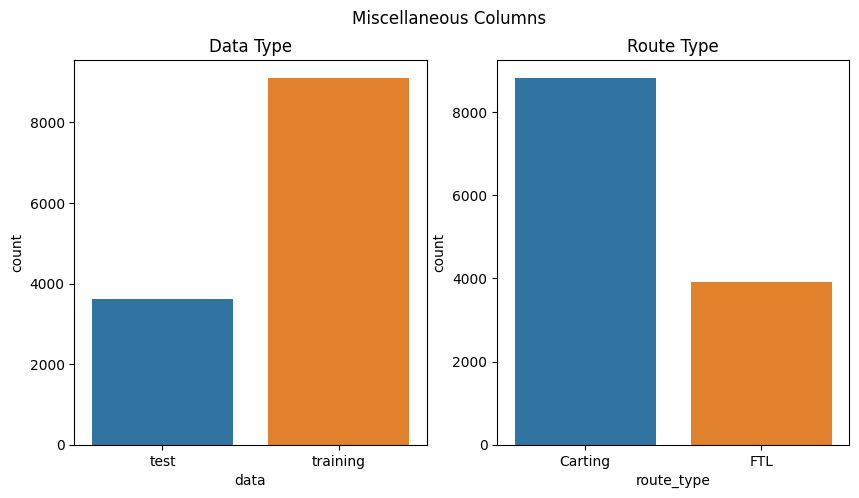

In [56]:
plt.figure(figsize=(10,5))
title = ['Data Type','Route Type']
subplots = [121,122]

for i in range(len(misc_cols)) :
    plt.subplot(subplots[i])
    plt.suptitle("Miscellaneous Columns")
    plt.title(title[i])
    sns.countplot(data = df , x =misc_cols[i])

### Transportation

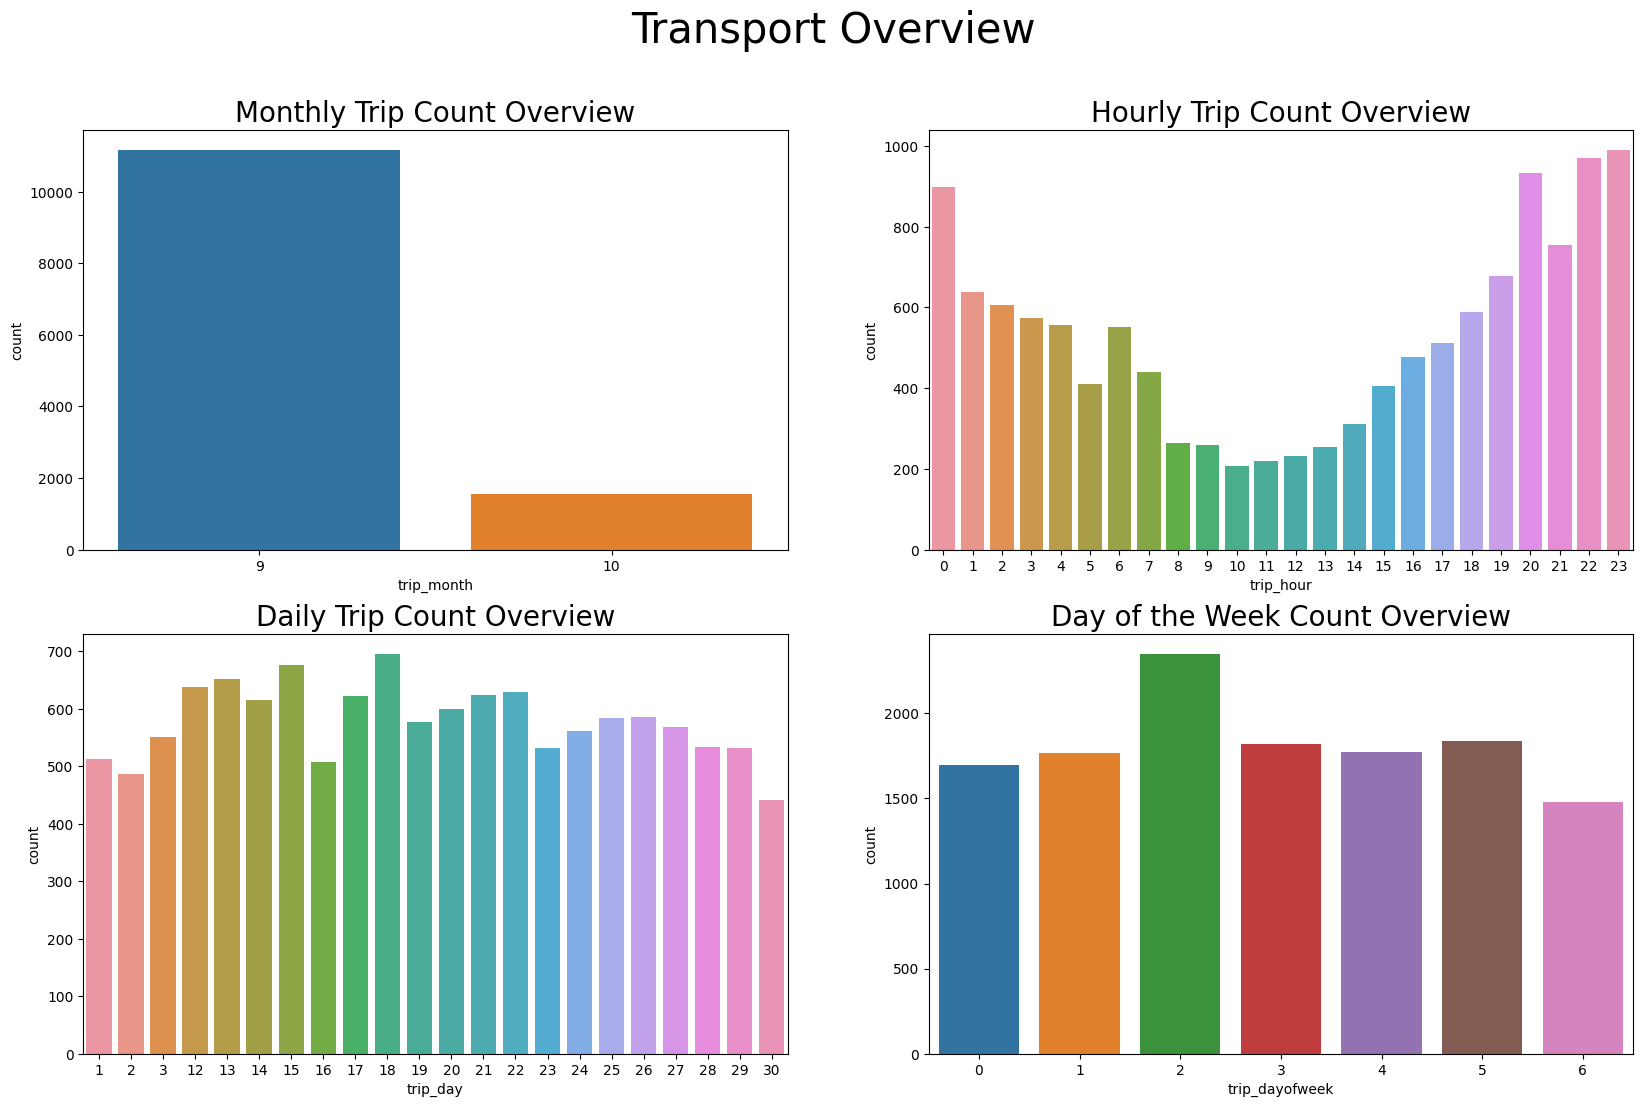

In [103]:
plt.figure(figsize=(20,12))
subplots = [221,222,223,224]
title = ['Monthly Trip Count Overview','Hourly Trip Count Overview','Daily Trip Count Overview', 'Day of the Week Count Overview']
for i in range(len(trips_cols)) :
    plt.subplot(subplots[i])
    plt.suptitle("Transport Overview",fontsize= 30)
    plt.title(title[i],fontsize = 20)
    sns.countplot(data = df , x =trips_cols[i])

### Region

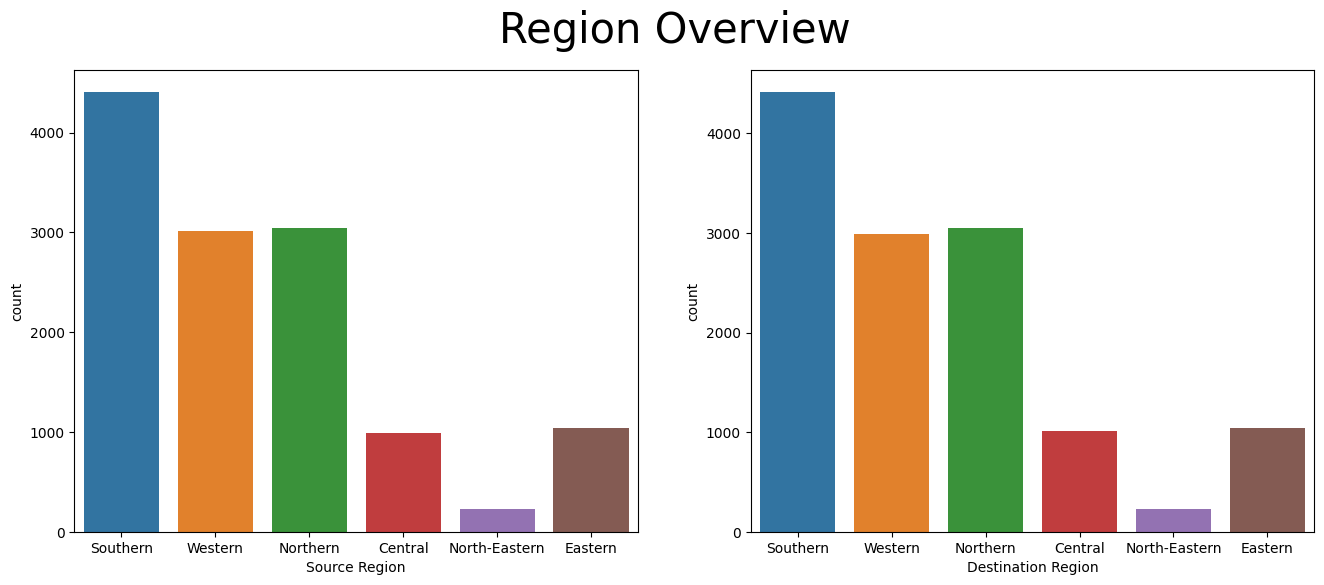

In [104]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(x='Source Region', data=df, ax=ax[0])
sns.countplot(x='Destination Region', data=df, ax=ax[1])
plt.suptitle("Region Overview",fontsize= 30)
plt.show()

In [151]:
df.groupby(['Source Region','Destination Region']).mean().sort_values(by=['Source Region','actual_distance_to_destination','actual_time'],ascending=[True,False,False])

od_time_diff_hour  delivery_duration  \
Source Region Destination Region                                         
Central       Western                    650.140496         649.600000   
              Central                    450.323727         449.257143   
              Northern                   364.609175         364.020408   
Eastern       Eastern                    409.884238         408.830606   
North-Eastern North-Eastern              422.840301         421.977974   
Northern      Western                    484.423381         484.000000   
              Northern                   316.635264         315.908903   
              Central                    318.919359         318.319728   
Southern      Western                    798.059957         797.666667   
              Eastern                    734.191598         733.666667   
              Southern                   318.939756         318.000681   
Western       Southern                   630.769039         629.466667   
              Northern                   590.288918         590.000000   
              Central                    405.803801         404.863636   
              Western                    248.400108         247.696471   

                                  actual_distance_to_destination  actual_time  \
Source Region Destination Region                                                
Central       Western                                 283.406860   582.000000   
              Central                                  94.724683   251.986905   
              Northern                                 81.442927   213.156463   
Eastern       Eastern                                  86.761812   255.336862   
North-Eastern North-Eastern                            81.824158   263.409692   
Northern      Western                                 219.523462   398.500000   
              Northern                                 79.425639   182.534507   
              Central                                  67.879625   174.517007   
Southern      Western                                 274.551399   556.333333   
              Eastern                                 170.473600   639.333333   
              Southern                                 72.421568   166.163942   
Western       Southern                                232.287137   467.400000   
              Northern                                220.053994   431.000000   
              Central                                 119.737445   205.909091   
              Western                                  51.503287   130.318319   

                                  segment_actual_time   osrm_time  \
Source Region Destination Region                                    
Central       Western                      575.600000  280.400000   
              Central                      250.345238  106.609524   
              Northern                     211.265306   90.795918   
Eastern       Eastern                      253.702599   91.345525   
North-Eastern North-Eastern                261.502203  100.431718   
Northern      Western                      395.000000  189.500000   
              Northern                     180.580400   83.359213   
              Central                      172.482993   82.816327   
Southern      Western                      551.666667  270.333333   
              Eastern                      632.333333  185.000000   
              Southern                     164.391916   81.539964   
Western       Southern                     464.200000  241.333333   
              Northern                     427.000000  195.000000   
              Central                      204.272727  102.500000   
              Western                      129.176134   52.833277   

                                  segment_osrm_time  osrm_distance  \
Source Region Destination Region                                     
Central       Western                    317.000000     387.856580   
             

### State

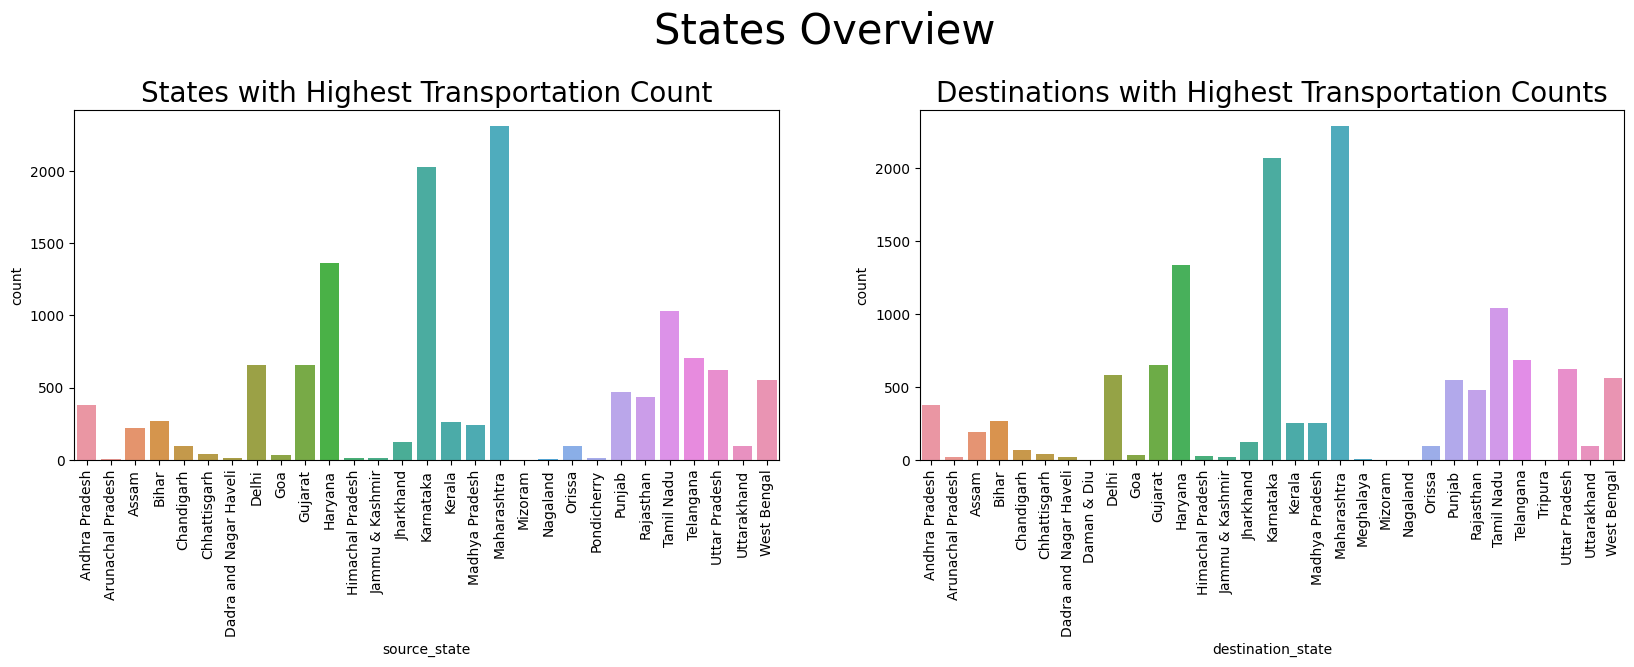

In [58]:
plt.figure(figsize=[20,10])
subplots = [221,222]
title = ['States with Highest Transportation Count','Destinations with Highest Transportation Counts']
for i in range(len(state_cols)) :
    plt.subplot(subplots[i])
    plt.suptitle("States Overview",fontsize= 30)
    plt.title(title[i],fontsize = 20)
    plt.xticks(rotation = 90)
    sns.countplot(data = df , x =state_cols[i])

Since The other remaining columns related state are Difficult to plot as they have more than 700 unique values, we can still get overview of them

In [59]:
state_dff_cols = ['source_city', 'destination_city', 'source_place', 'destination_place']

In [60]:
df[state_dff_cols].describe()

,source_city,destination_city,source_place,destination_place
count,12730,12730,12730,12730
unique,707,827,748,847
top,Bengaluru,Bengaluru,Central,Central
freq,1034,1073,728,673


In [118]:
table = df.groupby(['source_state']).mean()
table.loc[['Maharashtra','Karnataka']]

,od_time_diff_hour,delivery_duration,actual_distance_to_destination,actual_time,segment_actual_time,osrm_time,segment_osrm_time,osrm_distance,segment_osrm_distance,trip_year
source_state,,,,,,,,,,
Maharashtra,240.347949,239.702773,44.662977,120.971837,119.950173,45.470104,47.384315,56.030046,57.767200,2018.0
Karnataka,262.016021,261.282963,52.781558,131.950123,130.436049,63.860741,68.609877,66.177376,71.404021,2018.0


# Bi-Variate Analysis

## Hypothesis Testing
*  **Actual Time vs Osrm Time**
    * Data was not Normal (QQPLot(applied log) and Hist-plot)
    * We Reject Null Hypothesis, and we can say the difference between them is not by chance
    * The Actual Time is less than OSRM Time
* **Actual Time vs Segment Actual Time**
    * Apparently There's a significant difference between b/w Actual_time and Segment_actual_time
    * The Actual Time is less than Segment Actual Time
* **Osrm distance vs Segment osrm distance**
    * Turns out Segment OSRM Distance is less than Segment OSRM distance
* **Osrm time vs Segment osrm time**
    *  Turns out Segment OSRM time is Less than OSRM time
* Overall There's significant difference between OSRM and Actual parameters
     

### Actual_time vs OSRM_time
Ho : There's no Difference in the mean of Actual_time vs OSRM_time
Ha : There's Difference in the mean of Actual_time vs OSRM_time

<Axes: xlabel='actual_time', ylabel='Density'>

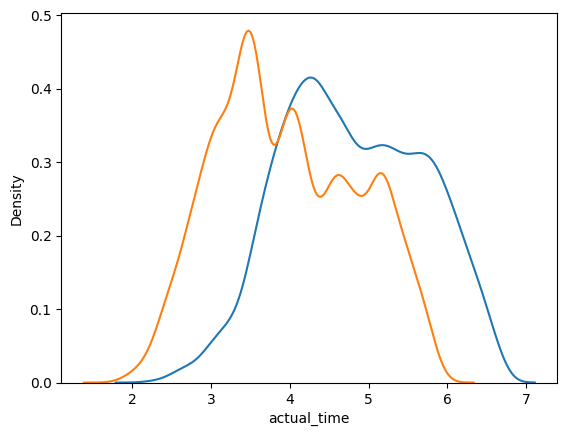

In [61]:
sns.kdeplot(data=np.log(df['actual_time']))
sns.kdeplot(data=np.log(df['osrm_time']))

In [62]:
from statsmodels.graphics.gofplots import qqplot

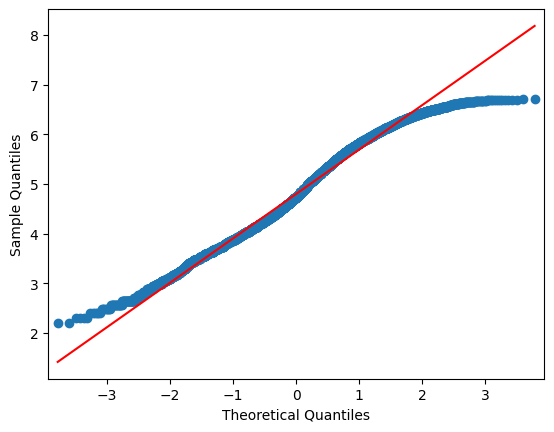

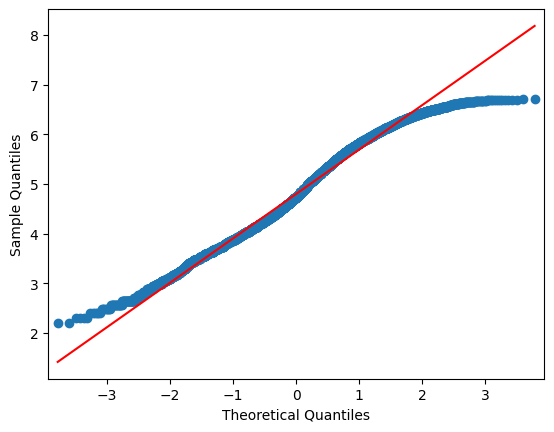

In [63]:
qqplot(data=np.log(df['actual_time']),line='s')

---
Although Data is not Normal we can still check perform ttest because sample size is relatively huge

In [64]:
def t_ind(d1,d2,alpha = 0.05) :
    alt = input()
    stat,p_value = ttest_ind(d1,d2,alternative=alt)

    print(f"alternative chosen : {alt}")
    print(f"test_statistics : {stat}")
    print(f"Probability : {p_value}")

    if p_value > alpha :
        return "Failed to Reject Ho"
    else :
        return "Reject Ho"

In [65]:
def t_rel(d1,d2,alpha = 0.05) :
    alt = input()
    stat,p_value = ttest_rel(d1,d2,alternative=alt)

    print(f"alternative chosen : {alt}")
    print(f"test_statistics : {stat}")
    print(f"Probability : {p_value}")

    if p_value > alpha :
        return "Failed to Reject Ho"
    else :
        return "Reject Ho"

In [66]:
t_rel(df['actual_time'],df['osrm_time'])

two-sided
alternative chosen : two-sided
test_statistics : 108.61001780897652
Probability : 0.0


'Reject Ho'

#### Actual_time vs OSRM_time
Ho : Actual Time < OSRM Time </br>
Ha : Actual Time > OSRM Time </br>
Test: Left Tailed  </br>
Result : Failed to Reject Ho

In [82]:
t_rel(df['actual_time'],df['osrm_time'])

less
alternative chosen : less
test_statistics : 108.61001780897652
Probability : 1.0


'Failed to Reject Ho'

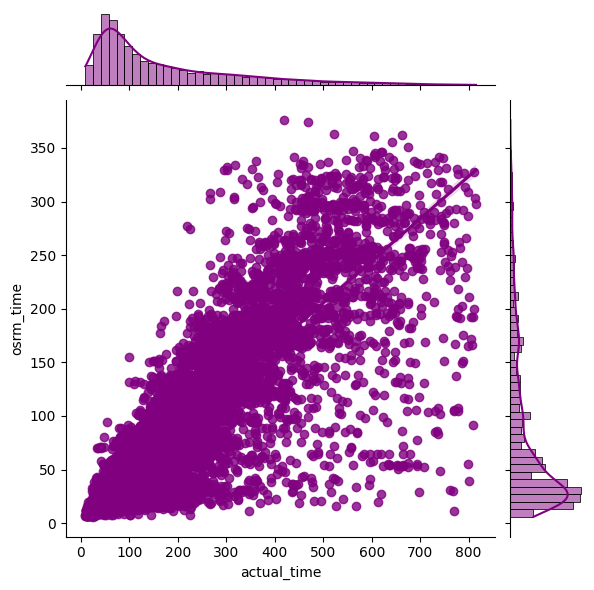

In [68]:
sns.jointplot(data=df,x='actual_time',y = 'osrm_time',color='purple',kind='reg')

### Actual_time vs Segment_actual_time
Ho : There's no Difference in the mean of Actual_time vs Segment_actual_time </br>
Ha : There's Difference in the mean of Actual_time vs Segment_actual_time

In [69]:
t_rel(df['actual_time'],df['segment_actual_time'])

two-sided
alternative chosen : two-sided
test_statistics : 107.27111528015433
Probability : 0.0


'Reject Ho'

#### Actual_time vs Segment_actual_time
Ho : Actual Time < Segment_actual_time </br>
Ha : Actual Time > Segment_actual_time </br>
Test : Left-Tailed </br>
Result : Failed to reject Ho

In [84]:
t_rel(df['actual_time'],df['segment_actual_time'])

less
alternative chosen : less
test_statistics : 107.27111528015433
Probability : 1.0


'Failed to Reject Ho'

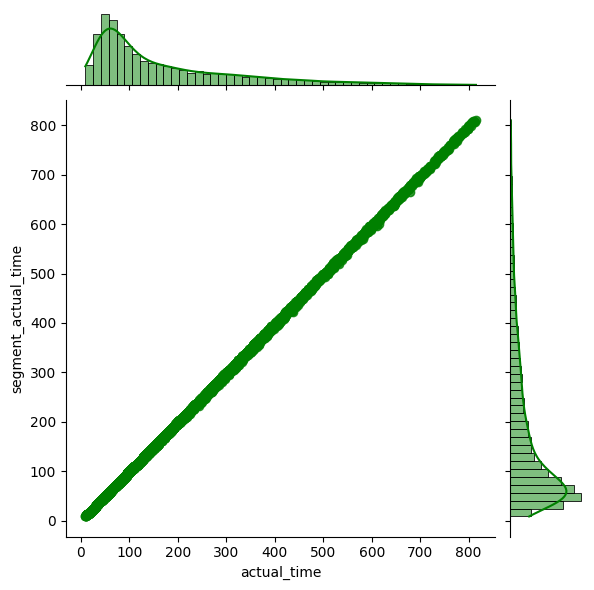

In [83]:
sns.jointplot(data=df,x='actual_time',y = 'segment_actual_time',color='green',kind='reg')

### osrm_distance vs segment_osrm_distance
Ho : There's no Difference in the mean of osrm_distance vs segment_osrm_distance </br>
Ha : There's Difference in the mean of osrm_distance vs segment_osrm_distance

In [71]:
t_rel(df['osrm_distance'],df['segment_osrm_distance'])

two-sided
alternative chosen : two-sided
test_statistics : -36.32982721633417
Probability : 4.624183336002095e-275


'Reject Ho'

#### osrm_distance vs segment_osrm_distance
Ho : Osrm_Distance < Segment_OSRM_Distance </br>
Ha : Osrm_Distance > Segment_OSRM_Distance </br>
Test : Right Tail</br>
Result : Failed to Reject Ho

In [89]:
t_rel(df['osrm_distance'],df['segment_osrm_distance'])

greater
alternative chosen : greater
test_statistics : -36.32982721633417
Probability : 1.0


'Failed to Reject Ho'

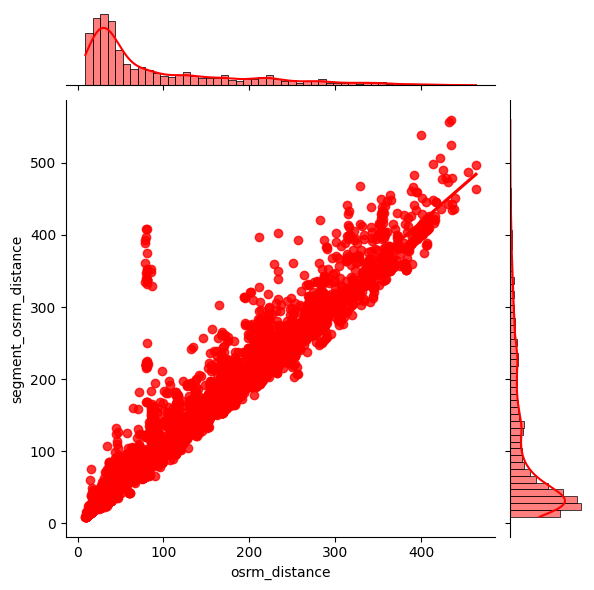

In [91]:
sns.jointplot(data=df,x='osrm_distance',y = 'segment_osrm_distance',color='red',kind='reg')

### OSRM_time vs Segment_OSRM_time
Ho : There's no Difference in the mean of OSRM_time vs Segment_OSRM_time </br>
Ha : There's Difference in the mean of OSRM_time vs Segment_OSRM_time

In [73]:
t_rel(df['osrm_time'],df['segment_osrm_time'])

two-sided
alternative chosen : two-sided
test_statistics : -44.14143844590457
Probability : 0.0


'Reject Ho'

#### osrm_time vs segment_osrm_time
Ho : osrm_time < segment_osrm_time </br>
Ha : osrm_time > segment_osrm_time </br>
Tail : Left Tail </br>
Result : Failed to reject Ho

In [74]:
t_rel(df['osrm_time'],df['segment_osrm_time'])

greater
alternative chosen : greater
test_statistics : -44.14143844590457
Probability : 1.0


'Failed to Reject Ho'

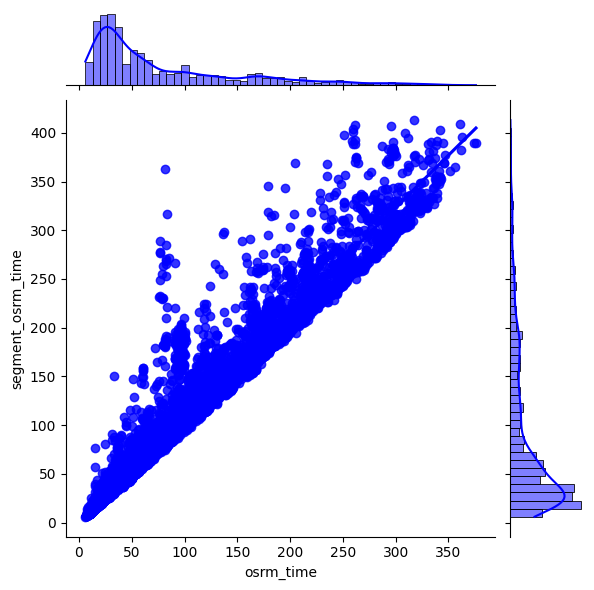

In [113]:
sns.jointplot(data=df,x='osrm_time',y = 'segment_osrm_time',color='blue',kind='reg')

## Co-Relation Analysis
* Dataset is fairly correlated

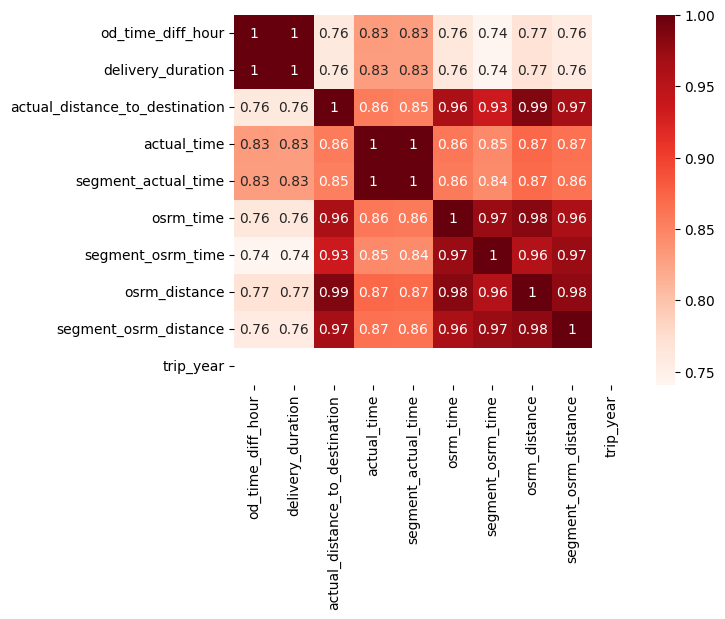

In [75]:
sns.heatmap(df.select_dtypes(exclude = ['datetime64',"category","object"]).corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

# Modelling The Data
* Here I am going to re-model data for further forecasting
* I converted categorical column to Numerical
* Standardised entire table

In [134]:
model = df.__deepcopy__()

In [135]:
model = model[model['data']=='training']

In [136]:
model.drop(columns=['trip_creation_time'],axis=1,inplace=True)

In [137]:
model.describe(include = 'all')

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_time_diff_hour,delivery_duration,...,trip_day,trip_dayofweek,source_state,destination_state,source_city,destination_city,source_place,destination_place,Source Region,Destination Region
count,9103,9103,9103,9103,9103,9103,9103,9103,9103.000000,9103.000000,...,9103.0,9103.0,9103,9103,9103,9103,9103,9103,9103,9103
unique,1,1256,2,9103,805,805,893,893,NaN,NaN,...,15.0,7.0,28,30,632,734,673,757,6,6
top,training,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,Carting,trip-153671042288605164,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),NaN,NaN,...,18.0,2.0,Maharashtra,Maharashtra,Bengaluru,Bengaluru,Bilaspur,Central,Southern,Southern
freq,9103,34,6177,1,502,502,428,428,NaN,NaN,...,696.0,1801.0,1566,1551,737,758,524,461,3175,3180
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323.619874,322.778425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.145395,255.824413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.461468,23.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.680716,136.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237.626960,237.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,428.754879,428.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
cols = ['data', 'route_schedule_uuid','route_type','source_center','source_name','destination_center','destination_name','route_schedule_uuid','source_state','destination_state','source_city','destination_city','source_place','destination_place','Source Region','Destination Region']

for i in range(len(cols)) :
    model[cols[i]] = LabelEncoder().fit_transform(model[cols[i]])

In [139]:
model.describe(include = 'all')

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_time_diff_hour,delivery_duration,...,trip_day,trip_dayofweek,source_state,destination_state,source_city,destination_city,source_place,destination_place,Source Region,Destination Region
count,9103.0,9103.000000,9103.000000,9103,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,...,9103.0,9103.0,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
unique,NaN,NaN,NaN,9103,NaN,NaN,NaN,NaN,NaN,NaN,...,15.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,trip-153671042288605164,NaN,NaN,NaN,NaN,NaN,NaN,...,18.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,696.0,1801.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.0,628.600461,0.321432,NaN,350.421619,346.974953,387.289575,389.407558,323.619874,322.778425,...,NaN,NaN,15.562122,16.140064,257.220257,307.826541,282.256399,331.534549,3.386796,3.373613
std,0.0,365.467702,0.467052,NaN,232.016784,224.342750,251.390280,252.774334,256.145395,255.824413,...,NaN,NaN,6.932251,7.412986,168.909421,201.163860,185.436157,205.685096,1.458467,1.466552
min,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,23.461468,23.000000,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,304.000000,0.000000,NaN,125.000000,127.000000,138.000000,161.000000,136.680716,136.000000,...,NaN,NaN,10.000000,10.000000,101.000000,137.000000,95.000000,124.000000,3.000000,3.000000
50%,0.0,636.000000,0.000000,NaN,348.000000,309.000000,379.000000,343.000000,237.626960,237.000000,...,NaN,NaN,16.000000,16.000000,222.000000,259.000000,271.000000,338.000000,4.000000,4.000000
75%,0.0,944.000000,1.000000,NaN,516.000000,536.000000,562.000000,603.500000,428.754879,428.000000,...,NaN,NaN,22.000000,23.000000,402.000000,477.000000,417.000000,481.500000,4.000000,4.000000


In [143]:
cols = ['delivery_duration', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
            'osrm_distance', 'segment_actual_time', 'segment_osrm_distance',
            'segment_osrm_time', 'od_time_diff_hour']

In [141]:
scaler = StandardScaler()

In [144]:
scaler.fit(model[cols])

StandardScaler()

In [145]:
model[cols] = scaler.transform(model[cols])

In [148]:
model[cols]

,delivery_duration,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,od_time_diff_hour
0,-0.558142,-0.016090,-0.240198,-0.169983,-0.099951,-0.243594,-0.170012,-0.287008,-0.554434
1,-0.870873,-0.773734,-0.765157,-0.886012,-0.812423,-0.759590,-0.833758,-0.892021,-0.871135
2,1.541070,0.717881,0.997205,0.492007,0.571685,1.008640,0.476083,0.330353,1.541120
3,-0.522959,-0.673343,-0.752658,-0.777932,-0.721123,-0.753297,-0.749252,-0.805591,-0.519780
4,-0.878692,-0.882958,-0.983889,-0.913032,-0.895849,-0.979832,-0.914859,-0.929063,-0.880854
...,...,...,...,...,...,...,...,...,...
9098,-0.843509,-0.547825,-0.840151,-0.737402,-0.633169,-0.841394,-0.525220,-0.608035,-0.845452
9099,0.532510,1.352112,0.772222,1.113466,1.236788,0.731764,1.106477,0.811894,0.539013
9100,-0.362684,0.397857,0.028531,0.167767,0.185308,0.026989,0.109871,0.046367,-0.360919
9101,1.935893,2.184727,2.784564,3.356123,2.553147,2.789454,2.311789,3.083781,1.938851


-----------
# Recomendations
- Expand the transport network of the eastern and noth eastern region, which currently has no transport activity with other regions.
- Strengthen the transport ties with the southern region, which has the highest transport activity and transports to all other regions.
- From state point of view, we have heavy traffic in Mahrashtra followed by Karnataka. This is a good indicator that we need to plan for resources on ground in these 2 states on priority.

-----------------